In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)



650

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pringsewu
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | havre-saint-pierre
Processing Record 4 of Set 1 | sao jose da coroa grande
Processing Record 5 of Set 1 | da lat
Processing Record 6 of Set 1 | san jose
Processing Record 7 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 1 | tuatapere
Processing Record 9 of Set 1 | la orilla
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | mersing
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | vanimo
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1 | salda

Processing Record 36 of Set 4 | codrington
Processing Record 37 of Set 4 | portland
Processing Record 38 of Set 4 | livadia
Processing Record 39 of Set 4 | kavieng
Processing Record 40 of Set 4 | souillac
Processing Record 41 of Set 4 | palmer
Processing Record 42 of Set 4 | carnarvon
Processing Record 43 of Set 4 | bethel
Processing Record 44 of Set 4 | kegayli
City not found. Skipping...
Processing Record 45 of Set 4 | tomatlan
Processing Record 46 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 47 of Set 4 | lasa
Processing Record 48 of Set 4 | luderitz
Processing Record 49 of Set 4 | aklavik
Processing Record 50 of Set 4 | izhma
Processing Record 1 of Set 5 | mandalgovi
Processing Record 2 of Set 5 | hasaki
Processing Record 3 of Set 5 | broome
Processing Record 4 of Set 5 | port blair
Processing Record 5 of Set 5 | am timan
Processing Record 6 of Set 5 | port elizabeth
Processing Record 7 of Set 5 | dori
Processing Record 8 of Set 5 | posse
Processing Record 9 of

Processing Record 26 of Set 8 | murray bridge
Processing Record 27 of Set 8 | toliary
City not found. Skipping...
Processing Record 28 of Set 8 | gizo
Processing Record 29 of Set 8 | osakarovka
Processing Record 30 of Set 8 | mudyuga
City not found. Skipping...
Processing Record 31 of Set 8 | paita
Processing Record 32 of Set 8 | yanam
Processing Record 33 of Set 8 | hailar
Processing Record 34 of Set 8 | cordoba
Processing Record 35 of Set 8 | tarbagatay
Processing Record 36 of Set 8 | bambous virieux
Processing Record 37 of Set 8 | diego de almagro
Processing Record 38 of Set 8 | nemuro
Processing Record 39 of Set 8 | baboua
City not found. Skipping...
Processing Record 40 of Set 8 | marsabit
Processing Record 41 of Set 8 | sur
Processing Record 42 of Set 8 | ixtapa
Processing Record 43 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 44 of Set 8 | conil
Processing Record 45 of Set 8 | kysyl-syr
Processing Record 46 of Set 8 | ascension
Processing Recor

Processing Record 16 of Set 12 | kunashak
Processing Record 17 of Set 12 | nantucket
Processing Record 18 of Set 12 | misterbianco
Processing Record 19 of Set 12 | kiama
Processing Record 20 of Set 12 | gboko
Processing Record 21 of Set 12 | karonga
Processing Record 22 of Set 12 | khani
Processing Record 23 of Set 12 | zabinka
City not found. Skipping...
Processing Record 24 of Set 12 | grand-santi
Processing Record 25 of Set 12 | junqueiro
Processing Record 26 of Set 12 | saint-augustin
Processing Record 27 of Set 12 | kushima
Processing Record 28 of Set 12 | alotau
City not found. Skipping...
Processing Record 29 of Set 12 | chumikan
Processing Record 30 of Set 12 | samoded
Processing Record 31 of Set 12 | leticia
Processing Record 32 of Set 12 | mabaruma
Processing Record 33 of Set 12 | coihaique
Processing Record 34 of Set 12 | zabol
Processing Record 35 of Set 12 | svit
Processing Record 36 of Set 12 | vostok
Processing Record 37 of Set 12 | nelson bay
Processing Record 38 of Set

In [36]:
len(city_data)

601

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pringsewu,-5.3582,104.9744,77.74,87,59,5.23,ID,2021-10-09 12:19:51
1,Avarua,-21.2078,-159.7750,68.05,83,79,1.14,CK,2021-10-09 12:19:51
2,Havre-Saint-Pierre,50.2334,-63.5986,39.20,81,1,4.61,CA,2021-10-09 12:19:52
3,Sao Jose Da Coroa Grande,-8.8978,-35.1478,80.91,67,69,10.83,BR,2021-10-09 12:19:52
4,Da Lat,11.9465,108.4419,62.33,99,99,3.15,VN,2021-10-09 12:19:52
5,San Jose,37.3394,-121.8950,56.77,81,40,4.61,US,2021-10-09 12:19:52
6,Tuatapere,-46.1333,167.6833,46.81,94,66,4.85,NZ,2021-10-09 12:19:53
7,La Orilla,17.9833,-102.2333,76.24,92,99,5.03,MX,2021-10-09 12:19:53
8,Ushuaia,-54.8000,-68.3000,42.46,56,75,16.11,AR,2021-10-09 12:17:40
9,Hermanus,-34.4187,19.2345,68.81,67,44,10.56,ZA,2021-10-09 12:19:53


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pringsewu,ID,2021-10-09 12:19:51,-5.3582,104.9744,77.74,87,59,5.23
1,Avarua,CK,2021-10-09 12:19:51,-21.2078,-159.7750,68.05,83,79,1.14
2,Havre-Saint-Pierre,CA,2021-10-09 12:19:52,50.2334,-63.5986,39.20,81,1,4.61
3,Sao Jose Da Coroa Grande,BR,2021-10-09 12:19:52,-8.8978,-35.1478,80.91,67,69,10.83
4,Da Lat,VN,2021-10-09 12:19:52,11.9465,108.4419,62.33,99,99,3.15


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

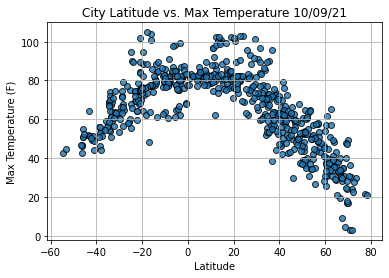

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

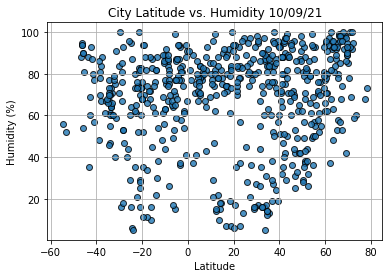

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

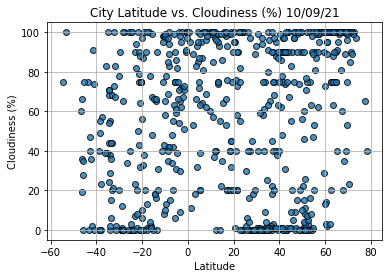

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

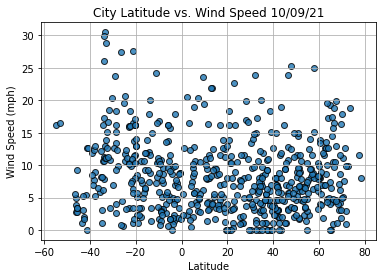

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                       Barrow
Country                        US
Date          2021-10-09 12:19:55
Lat                       71.2906
Lng                     -156.7887
Max Temp                    30.22
Humidity                       69
Cloudiness                     90
Wind Speed                  12.66
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
596     True
597    False
598     True
599     True
600     True
Name: Lat, Length: 601, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Havre-Saint-Pierre,CA,2021-10-09 12:19:52,50.2334,-63.5986,39.20,81,1,4.61
4,Da Lat,VN,2021-10-09 12:19:52,11.9465,108.4419,62.33,99,99,3.15
5,San Jose,US,2021-10-09 12:19:52,37.3394,-121.8950,56.77,81,40,4.61
7,La Orilla,MX,2021-10-09 12:19:53,17.9833,-102.2333,76.24,92,99,5.03
11,Mersing,MY,2021-10-09 12:19:54,2.4312,103.8405,82.31,89,89,2.30


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

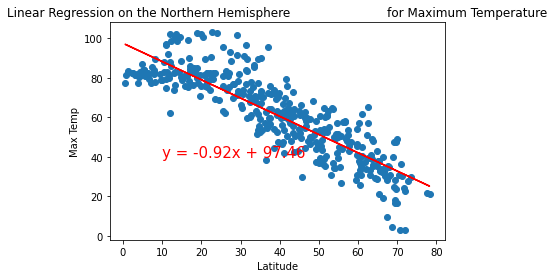

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

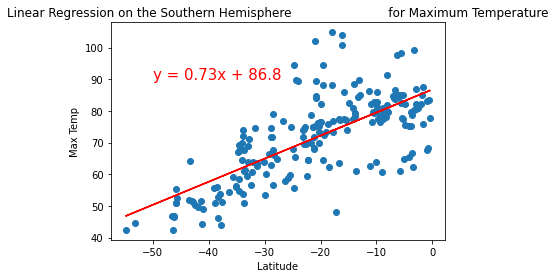

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

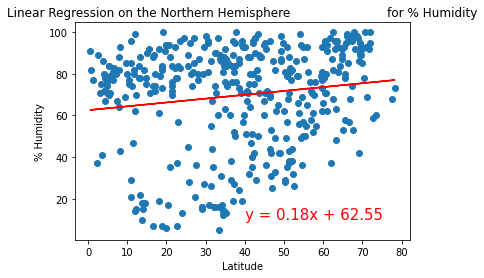

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

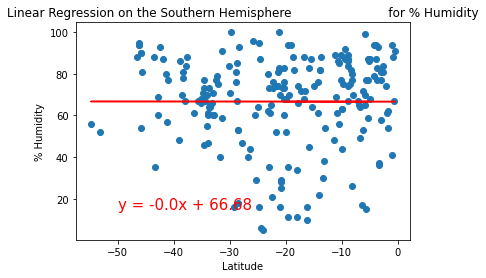

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [27]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(slope, intercept, r_value, p_value, std_err)

-0.0008520038687636158 66.68223224194335 -0.0005170253122222054 0.9940576591091542 0.11426100397025625


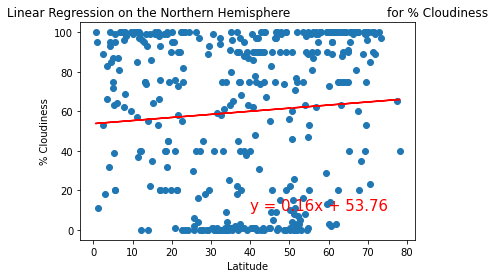

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

In [29]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(slope, intercept, r_value, p_value, std_err)

0.15660545375460827 53.76185923036171 0.07924305645857109 0.11772972783389606 0.09988562610958403


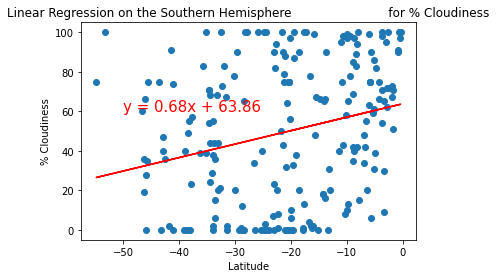

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [31]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(slope, intercept, r_value, p_value, std_err)

0.681610882717457 63.85722599364745 0.25339636855355946 0.0002065290450769953 0.18042375896655857


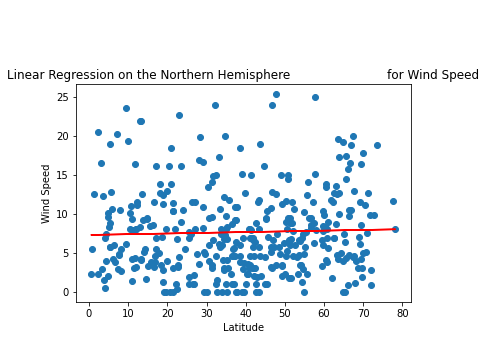

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [33]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(slope, intercept, r_value, p_value, std_err)

0.009181347492712806 7.298929138404366 0.03417102149760774 0.5004882798062849 0.013615072566428243


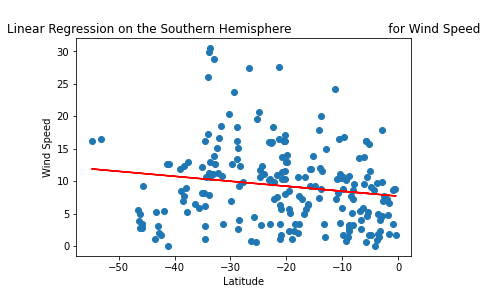

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [35]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(slope, intercept, r_value, p_value, std_err)

-0.07663172195533195 7.673249163665195 -0.16174237568961675 0.01900955661819607 0.03241878773219275


In [37]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 95


In [38]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pringsewu,ID,2021-10-09 12:19:51,-5.3582,104.9744,77.74,87,59,5.23
3,Sao Jose Da Coroa Grande,BR,2021-10-09 12:19:52,-8.8978,-35.1478,80.91,67,69,10.83
7,La Orilla,MX,2021-10-09 12:19:53,17.9833,-102.2333,76.24,92,99,5.03
11,Mersing,MY,2021-10-09 12:19:54,2.4312,103.8405,82.31,89,89,2.30
15,Vanimo,PG,2021-10-09 12:19:55,-2.6741,141.3028,81.59,84,72,6.98
18,Atuona,PF,2021-10-09 12:15:16,-9.8000,-139.0333,77.45,75,13,16.84
21,Victoria,HK,2021-10-09 12:18:59,22.2855,114.1577,82.26,93,100,1.01
26,Alta Floresta,BR,2021-10-09 12:19:58,-9.8756,-56.0861,82.85,63,65,1.68
27,Itarema,BR,2021-10-09 12:19:58,-2.9248,-39.9167,86.97,58,72,17.87
47,New Amsterdam,GY,2021-10-09 12:20:05,6.2500,-57.5167,82.54,77,87,4.27


In [39]:
preferred_cities_df.count()

City          208
Country       208
Date          208
Lat           208
Lng           208
Max Temp      208
Humidity      208
Cloudiness    208
Wind Speed    208
dtype: int64

In [40]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Pringsewu,ID,77.74,-5.3582,104.9744,
3,Sao Jose Da Coroa Grande,BR,80.91,-8.8978,-35.1478,
7,La Orilla,MX,76.24,17.9833,-102.2333,
11,Mersing,MY,82.31,2.4312,103.8405,
15,Vanimo,PG,81.59,-2.6741,141.3028,
18,Atuona,PF,77.45,-9.8000,-139.0333,
21,Victoria,HK,82.26,22.2855,114.1577,
26,Alta Floresta,BR,82.85,-9.8756,-56.0861,
27,Itarema,BR,86.97,-2.9248,-39.9167,
47,New Amsterdam,GY,82.54,6.2500,-57.5167,


In [ ]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}